In [2]:
import pandas as pd
from pandas import option_context
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [3]:
QUERY_ROOT = "https://api.github.com"
TOKEN = '' # write your GitHub API key here
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [4]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv('homebrew_homebrew-core_1/homebrew_homebrew-core_1.csv')
print(df)

                contributor bothunter
0            flyio-buildbot       Bot
1         blockstack-devops       Bot
2                SMillerDev     Human
3                    petere     Human
4                 bfontaine     Human
5                   zuisong     Human
6          asyncapi-bot-eve       Bot
7            EricFromCanada     Human
8                   Moulick     Human
9               BrewTestBot       Bot
10                 carlocab     Human
11                  ddollar     Human
12                  seratch     Human
13                   sferik     Human
14                  samford     Human
15            jesseduffield     Human
16                    claui     Human
17               jeremylong     Human
18                  tchajed     Human
19          FnControlOption     Human
20         flyio-flyctl-bot       Bot
21                     avsm     Human
22              denysdovhan     Human
23                 derrabus     Human
24  github-merge-queue[bot]       Bot
25          

In [5]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW
contributors = df.contributor.to_list()
print(contributors)

['flyio-buildbot', 'blockstack-devops', 'SMillerDev', 'petere', 'bfontaine', 'zuisong', 'asyncapi-bot-eve', 'EricFromCanada', 'Moulick', 'BrewTestBot', 'carlocab', 'ddollar', 'seratch', 'sferik', 'samford', 'jesseduffield', 'claui', 'jeremylong', 'tchajed', 'FnControlOption', 'flyio-flyctl-bot', 'avsm', 'denysdovhan', 'derrabus', 'github-merge-queue[bot]', 'jidicula', 'bevanjkay', 'branchvincent', 'nevack', 'mkhl', 'wing328', 'stgraber', 'soloio-bot', 'matchai', 'kevinAlbs', 'curquiza', 'dandavison', 'pulumi-bot', 'epistrephein', 'github-actions[bot]']


In [6]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_list_dict = []
for contributor in contributors:
    query = f'{QUERY_ROOT}/users/{contributor}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    app_dict = {'contributor': contributor}
    if json_response['type'] == 'Bot':
        app_dict['app'] = True
    else:
        app_dict['app'] = False
    app_list_dict.append(app_dict)

df_dict = pd.DataFrame.from_dict(app_list_dict)
df_dict.to_csv('homebrew_homebrew-core_1/github_result.csv')
print(df_dict)

                contributor    app
0            flyio-buildbot  False
1         blockstack-devops  False
2                SMillerDev  False
3                    petere  False
4                 bfontaine  False
5                   zuisong  False
6          asyncapi-bot-eve  False
7            EricFromCanada  False
8                   Moulick  False
9               BrewTestBot  False
10                 carlocab  False
11                  ddollar  False
12                  seratch  False
13                   sferik  False
14                  samford  False
15            jesseduffield  False
16                    claui  False
17               jeremylong  False
18                  tchajed  False
19          FnControlOption  False
20         flyio-flyctl-bot  False
21                     avsm  False
22              denysdovhan  False
23                 derrabus  False
24  github-merge-queue[bot]   True
25                 jidicula  False
26                bevanjkay  False
27            branch

### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [7]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
result_df = pd.merge(df, df_dict, on='contributor')
result_df.to_csv('homebrew_homebrew-core_1/github.csv')
print(result_df)

                contributor bothunter    app
0            flyio-buildbot       Bot  False
1         blockstack-devops       Bot  False
2                SMillerDev     Human  False
3                    petere     Human  False
4                 bfontaine     Human  False
5                   zuisong     Human  False
6          asyncapi-bot-eve       Bot  False
7            EricFromCanada     Human  False
8                   Moulick     Human  False
9               BrewTestBot       Bot  False
10                 carlocab     Human  False
11                  ddollar     Human  False
12                  seratch     Human  False
13                   sferik     Human  False
14                  samford     Human  False
15            jesseduffield     Human  False
16                    claui     Human  False
17               jeremylong     Human  False
18                  tchajed     Human  False
19          FnControlOption     Human  False
20         flyio-flyctl-bot       Bot  False
21        

### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [8]:
nbr_of_apps = result_df[result_df['app'] == True].shape[0]
nbr_of_users = result_df[result_df['app'] == False].shape[0]

print(f"Number of apps: {nbr_of_apps}")
print(f"Number of users: {nbr_of_users}")


Number of apps: 2
Number of users: 38


## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [9]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW
bodega_df = pd.read_csv('homebrew_homebrew-core_1/bodegha_predictions.csv')

unknowns = []

for user in df['contributor']:
    if user not in bodega_df['account'].tolist():
        unknowns.append(user)


#for every element in unknowns add a record in bodega_df with 'Unknown' as prediction
for unknown in unknowns:
    bodega_df.loc[len(bodega_df.index)] = [unknown, 'Unknown']

bodega_df = bodega_df.rename(columns={'account':'contributor', 'prediction':'bodegha'})
print(bodega_df)


                contributor  bodegha
0                  curquiza      Bot
1                jeremylong      Bot
2                pulumi-bot      Bot
3               BrewTestBot    Human
4            EricFromCanada    Human
5                   Moulick    Human
6                SMillerDev    Human
7                 bevanjkay    Human
8             branchvincent    Human
9                  carlocab    Human
10                 derrabus    Human
11                  samford    Human
12                  zuisong    Human
13      github-actions[bot]      Bot
14           flyio-buildbot  Unknown
15        blockstack-devops  Unknown
16                   petere  Unknown
17                bfontaine  Unknown
18         asyncapi-bot-eve  Unknown
19                  ddollar  Unknown
20                  seratch  Unknown
21                   sferik  Unknown
22            jesseduffield  Unknown
23                    claui  Unknown
24                  tchajed  Unknown
25          FnControlOption  Unknown
2

In [10]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha

# YOUR CODE BELOW
final_df = pd.merge(result_df, bodega_df, on='contributor')
print(final_df)




                contributor bothunter    app  bodegha
0            flyio-buildbot       Bot  False  Unknown
1         blockstack-devops       Bot  False  Unknown
2                SMillerDev     Human  False    Human
3                    petere     Human  False  Unknown
4                 bfontaine     Human  False  Unknown
5                   zuisong     Human  False    Human
6          asyncapi-bot-eve       Bot  False  Unknown
7            EricFromCanada     Human  False    Human
8                   Moulick     Human  False    Human
9               BrewTestBot       Bot  False    Human
10                 carlocab     Human  False    Human
11                  ddollar     Human  False  Unknown
12                  seratch     Human  False  Unknown
13                   sferik     Human  False  Unknown
14                  samford     Human  False    Human
15            jesseduffield     Human  False  Unknown
16                    claui     Human  False  Unknown
17               jeremylong 

In [11]:
# Read the predictions given by RABBIT from the corresponding .csv file 

# YOUR CODE BELOW
rabbit_df = pd.read_csv('homebrew_homebrew-core_1/rabbit_predictions.csv')
rabbit_df = rabbit_df.rename(columns={'account':'contributor', 'prediction':'rabbit'})
#drop index and confidence columns
rabbit_df = rabbit_df.drop(columns=['index', 'confidence'])
print(rabbit_df)

                contributor rabbit
0            flyio-buildbot    bot
1         blockstack-devops    bot
2                SMillerDev  human
3                    petere  human
4                 bfontaine  human
5                   zuisong  human
6          asyncapi-bot-eve    bot
7            EricFromCanada  human
8                   Moulick  human
9               BrewTestBot    bot
10                 carlocab  human
11                  ddollar  human
12                  seratch  human
13                   sferik  human
14                  samford  human
15            jesseduffield  human
16                    claui  human
17               jeremylong  human
18                  tchajed  human
19          FnControlOption  human
20         flyio-flyctl-bot    bot
21                     avsm  human
22              denysdovhan  human
23                 derrabus  human
24  github-merge-queue[bot]    app
25                 jidicula  human
26                bevanjkay  human
27            branch

In [12]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
rabbit_full_df = pd.merge(final_df, rabbit_df, on='contributor')
print(rabbit_full_df)



                contributor bothunter    app  bodegha rabbit
0            flyio-buildbot       Bot  False  Unknown    bot
1         blockstack-devops       Bot  False  Unknown    bot
2                SMillerDev     Human  False    Human  human
3                    petere     Human  False  Unknown  human
4                 bfontaine     Human  False  Unknown  human
5                   zuisong     Human  False    Human  human
6          asyncapi-bot-eve       Bot  False  Unknown    bot
7            EricFromCanada     Human  False    Human  human
8                   Moulick     Human  False    Human  human
9               BrewTestBot       Bot  False    Human    bot
10                 carlocab     Human  False    Human  human
11                  ddollar     Human  False  Unknown  human
12                  seratch     Human  False  Unknown  human
13                   sferik     Human  False  Unknown  human
14                  samford     Human  False    Human  human
15            jesseduffi

In [13]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency
# YOUR CODE BELOW
for prediction in rabbit_full_df['rabbit']:
    if prediction == 'bot' or prediction == 'app':
        rabbit_full_df['rabbit'] = rabbit_full_df['rabbit'].replace(prediction, 'Bot')
    elif prediction == 'human':
        rabbit_full_df['rabbit'] = rabbit_full_df['rabbit'].replace(prediction, 'Human')
    elif prediction == 'unknown':
        rabbit_full_df['rabbit'] = rabbit_full_df['rabbit'].replace(prediction, 'Unknown')


print(rabbit_full_df)
rabbit_full_df.to_csv('homebrew_homebrew-core_1/rabbit_full_df.csv')


                contributor bothunter    app  bodegha rabbit
0            flyio-buildbot       Bot  False  Unknown    Bot
1         blockstack-devops       Bot  False  Unknown    Bot
2                SMillerDev     Human  False    Human  Human
3                    petere     Human  False  Unknown  Human
4                 bfontaine     Human  False  Unknown  Human
5                   zuisong     Human  False    Human  Human
6          asyncapi-bot-eve       Bot  False  Unknown    Bot
7            EricFromCanada     Human  False    Human  Human
8                   Moulick     Human  False    Human  Human
9               BrewTestBot       Bot  False    Human    Bot
10                 carlocab     Human  False    Human  Human
11                  ddollar     Human  False  Unknown  Human
12                  seratch     Human  False  Unknown  Human
13                   sferik     Human  False  Unknown  Human
14                  samford     Human  False    Human  Human
15            jesseduffi

### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [14]:
# Write your manual decision here
# example : 
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW

In [15]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW


### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


In [16]:
'''
github-merge-queue[bot] : The purpose of the bot is to automatically merge PR or queue them. 
    If everything in the PR is ok it will merge, if not it will queue the PR.

github-actions[bot] : The purpose of the bot is to deploy all kind of actions on user's repositorys to automate their workflow.

'''

"\ngithub-merge-queue[bot] : The purpose of the bot is to automatically merge PR or queue them. \n    If everything in the PR is ok it will merge, if not it will queue the PR.\n\ngithub-actions[bot] : The purpose of the bot is to deploy all kind of actions on user's repositorys to automate their workflow.\n\n"

### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [17]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW
results = []
for index, row in rabbit_full_df.iterrows():
    contributor = row['contributor']
    predictions = row[['bothunter', 'bodegha', 'rabbit']]
    app = row['app']
    human_occurence = 0
    unknown_occurences = 0
    bot_occurences = 0
    for prediction in predictions:
        if prediction == 'Human':
            human_occurence += 1
        elif prediction == 'Unknown':
            unknown_occurences += 1
        elif prediction == 'Bot':
            bot_occurences += 1

    if human_occurence < bot_occurences:
        if app:
            results.append({'contributor': contributor, 'type': 'App'})
        else:
            results.append({'contributor': contributor, 'type': 'Bot'})
    
    else:
        results.append({'contributor': contributor, 'type': 'Human'})

results_df = pd.DataFrame.from_dict(results)

final_decision = pd.merge(rabbit_full_df, results_df, on='contributor')

print(final_decision)

                contributor bothunter    app  bodegha rabbit   type
0            flyio-buildbot       Bot  False  Unknown    Bot    Bot
1         blockstack-devops       Bot  False  Unknown    Bot    Bot
2                SMillerDev     Human  False    Human  Human  Human
3                    petere     Human  False  Unknown  Human  Human
4                 bfontaine     Human  False  Unknown  Human  Human
5                   zuisong     Human  False    Human  Human  Human
6          asyncapi-bot-eve       Bot  False  Unknown    Bot    Bot
7            EricFromCanada     Human  False    Human  Human  Human
8                   Moulick     Human  False    Human  Human  Human
9               BrewTestBot       Bot  False    Human    Bot    Bot
10                 carlocab     Human  False    Human  Human  Human
11                  ddollar     Human  False  Unknown  Human  Human
12                  seratch     Human  False  Unknown  Human  Human
13                   sferik     Human  False  Un

### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [18]:
converted_df1 = aggregate_raters(np.array(final_decision[['bothunter','rabbit']]))
kappa1 = fleiss_kappa(converted_df1[0])
print(f"Kappa: {kappa1}")

Kappa: 1.0


#### b. between bothunter and bodegha

In [19]:
converted_df2 = aggregate_raters(np.array(final_decision[['bothunter','bodegha']]))
kappa2 = fleiss_kappa(converted_df2[0])
print(f"Kappa: {kappa2}")

Kappa: -0.19772844605059373


#### c. between bodegha and rabbit

In [20]:
converted_df3 = aggregate_raters(np.array(final_decision[['bodegha','rabbit']]))
kappa3 = fleiss_kappa(converted_df3[0])
print(f"Kappa: {kappa3}")

Kappa: -0.19772844605059373


#### d. between bothunter, bodegha and rabbit

In [21]:
converted_df4 = aggregate_raters(np.array(final_decision[['bothunter', 'bodegha', 'rabbit']]))
kappa4 = fleiss_kappa(converted_df4[0])
print(f"Kappa: {kappa4}")

Kappa: 0.13604766633565038


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [22]:
'''
For the first pair of raters the kappa is 1.0 it means that we have a perfect agreement between the two raters. Globally they have the same predictions
For the second pair of raters the kappa is -0.19 it means that we have no agreement between the two raters. Globally they have different predictions
For the third pair of raters the kappa is -0.19 it means that we have no agreement between the two raters. Globally they have different predictions
For the fourth pair of raters the kappa is 0.13 it means that they slightly agree. Globally they have different predictions
'''

'\nFor the first pair of raters the kappa is 1.0 it means that we have a perfect agreement between the two raters. Globally they have the same predictions\nFor the second pair of raters the kappa is -0.19 it means that we have no agreement between the two raters. Globally they have different predictions\nFor the third pair of raters the kappa is -0.19 it means that we have no agreement between the two raters. Globally they have different predictions\nFor the fourth pair of raters the kappa is 0.13 it means that they slightly agree. Globally they have different predictions\n'

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [23]:
'''
As soon as bodegha is used the kappa is below 0.2. It means that the predictions are not reliable.
When we use bothunter and rabbit the kappa is 1.0 It means that the predictions are reliable.
So we can say that bodegha is not reliable for the predictions. I would use bothunter and rabbit for the predictions.
'''

'\nAs soon as bodegha is used the kappa is below 0.2. It means that the predictions are not reliable.\nWhen we use bothunter and rabbit the kappa is 1.0 It means that the predictions are reliable.\nSo we can say that bodegha is not reliable for the predictions. I would use bothunter and rabbit for the predictions.\n'

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [138]:
# YOUR CODE BELOW
events = []
for contributor in final_decision['contributor']:
    for k in range(1, 4):
        query = f'{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={k}'
        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        for event in json_response:
            event_dict = {}
            event_dict["event_id"] = event["id"]
            event_dict["contributor"] = event["actor"]["login"]
            event_dict["repo_name"] = event["repo"]["name"]
            event_dict["event_type"] = event["type"]
            event_dict["created_at"] = event["created_at"]

            events.append(event_dict)

events_df = pd.DataFrame.from_dict(events)
events_df

,event_id,contributor,repo_name,event_type,created_at
0,37004261258,flyio-buildbot,superfly/flyctl,CreateEvent,2024-03-29T17:15:05Z
1,37004209344,flyio-buildbot,superfly/flyctl,CreateEvent,2024-03-29T17:12:26Z
2,37004194235,flyio-buildbot,superfly/flyctl,CreateEvent,2024-03-29T17:11:42Z
3,36997111539,flyio-buildbot,superfly/flyctl,CreateEvent,2024-03-29T11:50:40Z
4,36984010934,flyio-buildbot,superfly/flyctl,CreateEvent,2024-03-28T23:06:37Z
...,...,...,...,...,...
8792,37006064382,github-actions[bot],hojlund123/awpy2-tests,PushEvent,2024-03-29T18:47:12Z
8793,37006064318,github-actions[bot],Sud-Austral/GithubAction,PushEvent,2024-03-29T18:47:12Z
8794,37006064189,github-actions[bot],bardcesh/Stevenson-Quant-AQ,PushEvent,2024-03-29T18:47:11Z
8795,37006063938,github-actions[bot],GOPIKA-K-P/weather,PushEvent,2024-03-29T18:47:11Z


In [25]:
events_df.to_csv('homebrew_homebrew-core_1/question5.csv', index=False)

### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [26]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

q5df = pd.read_csv('homebrew_homebrew-core_1/question5.csv')

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [27]:
# YOUR CODE BELOW
import numpy as np
q5df['event_group'] = np.nan
q5df.loc[q5df['event_type'].isin(issue_group), 'event_group'] = 'issue'
q5df.loc[q5df['event_type'].isin(pr_group), 'event_group'] = 'pr'
q5df.loc[q5df['event_type'].isin(commit_group), 'event_group'] = 'commit'
q5df.loc[q5df['event_type'].isin(repo_group), 'event_group'] = 'repo'


grouped_df = q5df.groupby(['contributor', 'event_group']).agg(nbr_event=('event_id','count')).reset_index()
print(grouped_df)



        contributor event_group  nbr_event
0       BrewTestBot      commit         67
1       BrewTestBot          pr         93
2       BrewTestBot        repo         90
3    EricFromCanada      commit         18
4    EricFromCanada       issue         12
..              ...         ...        ...
144         wing328        repo         36
145         zuisong      commit        120
146         zuisong       issue         27
147         zuisong          pr         53
148         zuisong        repo         89

[149 rows x 3 columns]


/tmp/ipykernel_51085/2341686744.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'issue' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  q5df.loc[q5df['event_type'].isin(issue_group), 'event_group'] = 'issue'


In [147]:
# YOUR CODE BELOW
pivoted_df = grouped_df.pivot_table(index='contributor', columns='event_group', values='nbr_event').reset_index()
final_q5df = pivoted_df.merge(final_decision, on='contributor')

final_q5df.drop(['app', 'bothunter', 'bodegha', 'rabbit'], axis=1, inplace=True)
final_events = final_q5df.copy()
final_q5df.to_csv('homebrew_homebrew-core_1/question5_merged.csv', index=False)

### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group. An example is given below

In [155]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [156]:
# YOUR CODE BELOW
medians = []
for event_group in ["pr", "issue", "commit", "repo"]:
    median_bot = final_q5df[(final_q5df['type'].isin(['Bot', 'App']))][event_group].median()
    medians.append({'event_group': event_group, 'median': median_bot, 'type': 'Bot_app'})

    median_human = final_q5df[(final_q5df['type'] == 'Human')][event_group].median()
    medians.append({'event_group': event_group, 'median': median_human, 'type': 'Human'})


df_medians_2_not_pivoted = pd.DataFrame.from_dict(medians)
df_medians_2_not_pivoted

,event_group,median,type
0,pr,22.5,Bot_app
1,pr,44.0,Human
2,issue,22.0,Bot_app
3,issue,30.0,Human
4,commit,78.0,Bot_app
5,commit,53.0,Human
6,repo,45.0,Bot_app
7,repo,31.0,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [157]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [158]:
# pivot the main DataFrame
df_medians.pivot(index='type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,event_group1,event_group2,event_group3,event_group4,event_group5
type,,,,,
Bot_app,val1,val3,val5,val7,NaN
Human,val2,val4,val6,NaN,val8


In [159]:
# YOUR CODE BELOW
df_medians_2 = df_medians_2_not_pivoted.pivot(index='type', columns='event_group', values='median').reset_index().rename_axis(None,axis=1)
df_medians_2

,type,commit,issue,pr,repo
0,Bot_app,78.0,22.0,22.5,45.0
1,Human,53.0,30.0,44.0,31.0


<Axes: xlabel='type'>

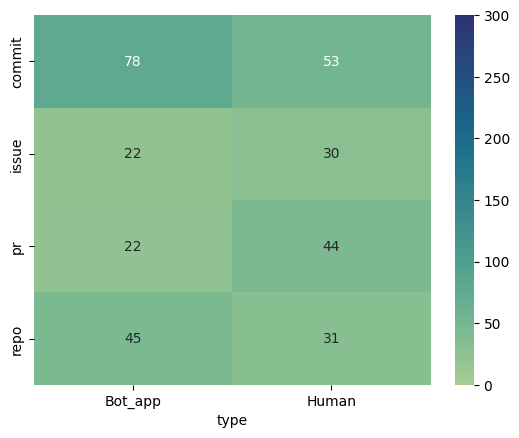

In [160]:
# YOUR CODE BELOW
sns.heatmap(df_medians_2.set_index('type').T, annot=True,vmin=0,vmax=300,cmap="crest")

#### What is the difference that you observe between Bots+Apps and Humans?

In [35]:
#Bots and app have more events than humans


#### What is the differnce that you observe between Event groups?

In [36]:
#The are more commut and pr event than repo and issue events

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [37]:
#Bot and App contributors have significantly more commit events than Human contributors.
#Human have twice the number of pr events than Bot and App contributors.
#Bot and App contributors are even to Human when it comes to repo and issue events.

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

<Axes: ylabel='pr'>

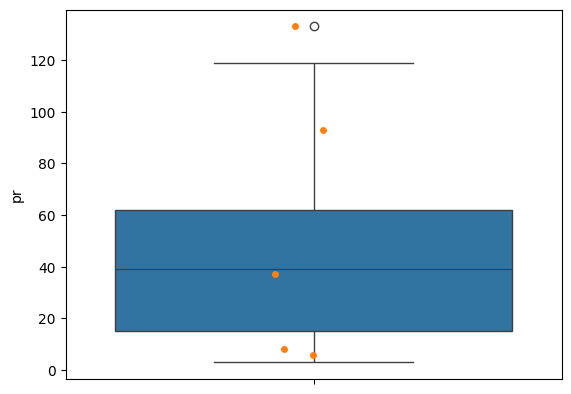

In [161]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
sns.boxplot(data=final_q5df, y='pr')
sns.stripplot(data=final_q5df[final_q5df.type=='Bot'], y='pr', jitter=True)
#sns.violinplot(data=final_q5df, x='type', y='pr')


<Axes: ylabel='issue'>

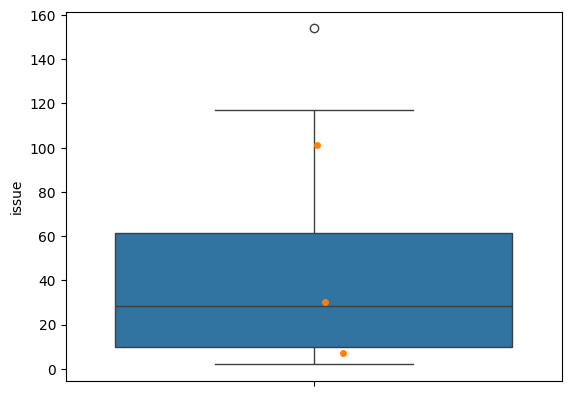

In [162]:
# YOUR CODE BELOW - Visualise number of events from issue event group
sns.boxplot(data=final_q5df, y='issue')
sns.stripplot(data=final_q5df[final_q5df.type=='Bot'], y='issue', jitter=True)

<Axes: ylabel='commit'>

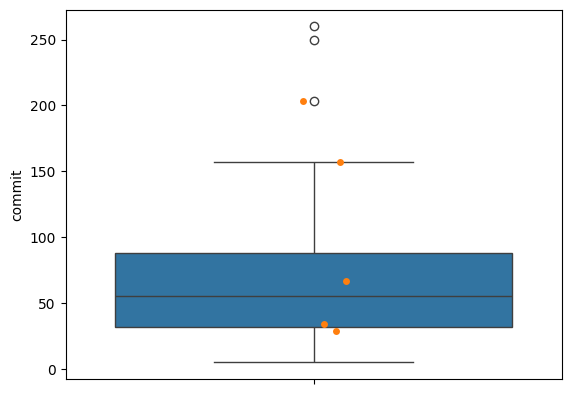

In [163]:
# YOUR CODE BELOW - Visualise number of events from commit event group
sns.boxplot(data=final_q5df, y='commit')
sns.stripplot(data=final_q5df[final_q5df.type=='Bot'], y='commit', jitter=True)

<Axes: ylabel='repo'>

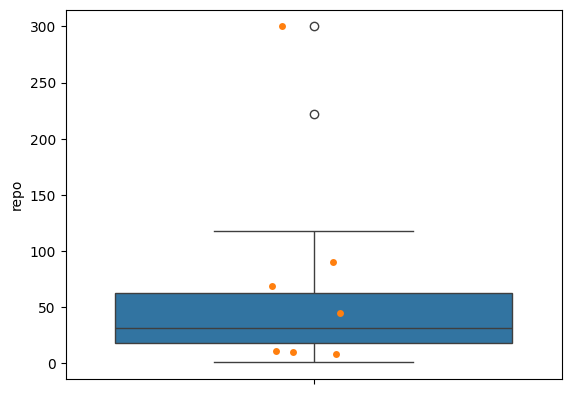

In [164]:
# YOUR CODE BELOW - Visualise number of events from repo event group
sns.boxplot(data=final_q5df, y='repo')
sns.stripplot(data=final_q5df[final_q5df.type=='Bot'], y='repo', jitter=True)

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [165]:
# YOUR CODE BELOW
final_q5df.fillna(0, inplace=True)

stats, p1 = shapiro(final_q5df['pr'])
if p1 < 0.05:
    print(f"Shapiro-Wilk Test for PR event results in a reject of H0, with p value : {p1}")
else:
    print(f"Shapiro-Wilk Test for PR event results in a fail to reject H0, with p value : {p1}")
stats, p2 = shapiro(final_q5df['commit'])
if p2 < 0.05:
    print(f"Shapiro-Wilk Test for commit event results in a reject of H0, with p value : {p2}")
else:
    print(f"Shapiro-Wilk Test for commit event results in a fail to reject H0, with p value : {p2}")

stats, p3 = shapiro(final_q5df['issue'])
if p3 < 0.05:
    print(f"Shapiro-Wilk Test for issue event results in a reject of H0, with p value : {p3}")
else:
    print(f"Shapiro-Wilk Test for issue event results in a fail to reject H0, with p value : {p3}")

stats, p4 = shapiro(final_q5df['repo'])
if p4 < 0.05:
    print(f"Shapiro-Wilk Test for repo event results in a reject of H0, with p value : {p4}")
else:
    print(f"Shapiro-Wilk Test for repo event results in a fail to reject H0, with p value : {p4}")

Shapiro-Wilk Test for PR event results in a reject of H0, with p value : 0.00294453105211427
Shapiro-Wilk Test for commit event results in a reject of H0, with p value : 2.1514240435709056e-05
Shapiro-Wilk Test for issue event results in a reject of H0, with p value : 3.7269880726082564e-05
Shapiro-Wilk Test for repo event results in a reject of H0, with p value : 5.069740499971447e-08


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [166]:
# YOUR CODE BELOW
stats, p12 = mannwhitneyu(final_q5df['pr'], final_q5df['commit'], method='exact', nan_policy='omit')
if p12 < 0.01:
    print(f"Mann-Whitney U Test for PR and commit event results in a reject of H0, with p value : {p12}")

stats, p13 = mannwhitneyu(final_q5df['pr'], final_q5df['issue'], method='exact', nan_policy='omit')
if p13 < 0.01:
    print(f"Mann-Whitney U Test for PR and issue event results in a reject of H0, with p value : {p13}")

stats, p14 = mannwhitneyu(final_q5df['pr'], final_q5df['repo'], method='exact', nan_policy='omit')
if p14 < 0.01:
    print(f"Mann-Whitney U Test for PR and repo event results in a reject of H0, with p value : {p14}")

stats, p23 = mannwhitneyu(final_q5df['commit'], final_q5df['issue'], method='exact', nan_policy='omit')
if p23 < 0.01:
    print(f"Mann-Whitney U Test for commit and issue event results in a reject of H0, with p value : {p23}")

stats, p24 = mannwhitneyu(final_q5df['commit'], final_q5df['repo'], method='exact', nan_policy='omit')

if p24 < 0.01:
    print(f"Mann-Whitney U Test for commit and repo event results in a reject of H0, with p value : {p24}")

stats, p34 = mannwhitneyu(final_q5df['issue'], final_q5df['repo'], method='exact', nan_policy='omit')

if p34 < 0.01:
    print(f"Mann-Whitney U Test for issue and repo event results in a reject of H0, with p value : {p34}")


Mann-Whitney U Test for PR and commit event results in a reject of H0, with p value : 0.008732450217983152
Mann-Whitney U Test for commit and issue event results in a reject of H0, with p value : 0.0009751386232442282


### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [167]:
# YOU CODE BELOW
effect_pr_commit = cd.cliffsDelta(final_q5df['pr'], final_q5df['commit'])

print(f"Effect size between PR and commit events : {effect_pr_commit}")

effect_commit_issue = cd.cliffsDelta(final_q5df['commit'], final_q5df['issue'])

print(f"Effect size between commit and issue events : {effect_commit_issue}")

Effect size between PR and commit events : (-0.339375, 'medium')
Effect size between commit and issue events : (0.423125, 'medium')


### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [172]:
#rename bothunter to type and convert Bot into App when app is True
result_df.rename(columns={'bothunter':'type'}, inplace=True)
for index, row in result_df.iterrows():
    if row['app']:
        result_df.at[index, 'type'] = 'App'
    elif row['type'] == 'Bot_app' and not row['app']:
        result_df.at[index, 'type'] = 'Bot'

#merge section6_df with result_df on the type and contributor
section6_df = final_events.merge(result_df[['type']], on='type')
        
#section6_df = final_events.merge(result_df[['contributor', 'type']], on='contributor')
section6_df.drop_duplicates(inplace=True)
section6_df.reset_index(drop=True, inplace=True)
print(section6_df)

# YOUR CODE BELOW - function for seaborn plot
def plot_seaborn(df,x, y, title):
    ax = sns.violinplot(data=df,x=x, y=y)
    sns.stripplot(data=df[df.type=='Bot'],x=x, y=y, jitter=True)
    ax.set_ylabel(title)
    return ax



                contributor  commit  issue     pr   repo   type
0               BrewTestBot    67.0    NaN   93.0   90.0    Bot
1            EricFromCanada    18.0   12.0   21.0   33.0  Human
2           FnControlOption    18.0    5.0    4.0    6.0  Human
3                   Moulick   100.0   63.0   22.0  105.0  Human
4                SMillerDev    55.0   48.0   65.0   15.0  Human
5          asyncapi-bot-eve   157.0    NaN    NaN   11.0    Bot
6                      avsm    20.0   33.0   18.0    7.0  Human
7                 bevanjkay    66.0   16.0   80.0   22.0  Human
8                 bfontaine    90.0   37.0    3.0   61.0  Human
9         blockstack-devops    34.0  101.0    6.0   69.0    Bot
10            branchvincent    28.0    9.0   62.0   95.0  Human
11                 carlocab    31.0   35.0   56.0   14.0  Human
12                    claui    72.0   17.0   69.0  118.0  Human
13                 curquiza    34.0  117.0   31.0   27.0  Human
14               dandavison   122.0   47

#### Total number of events

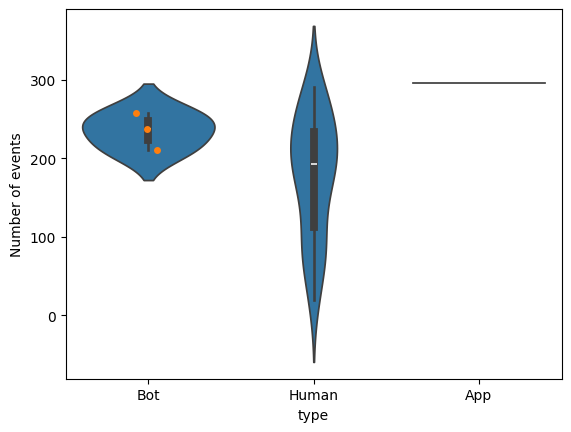

In [174]:
# YOUR CODE BELOW
# plot where x is the total number of events and y is the type of the contributor
# compute the total number of events
section6_df['total'] = section6_df['pr'] + section6_df['issue'] + section6_df['commit'] + section6_df['repo']
ax = plot_seaborn(section6_df,'type', 'total', 'Number of events')


#### Number of event types

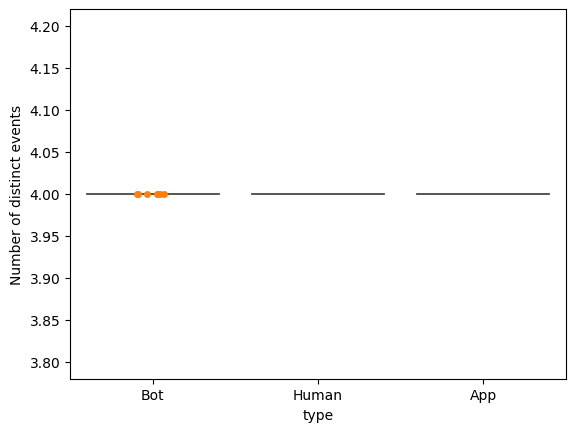

In [178]:
# YOUR CODE BELOW
section6_df['distinct'] = section6_df[['pr', 'issue', 'commit', 'repo']].astype(bool).sum(axis=1)
ax = plot_seaborn(section6_df,'type', 'distinct', 'Number of distinct events')

#### Mean number of events per event type

(0.0, 400.0)

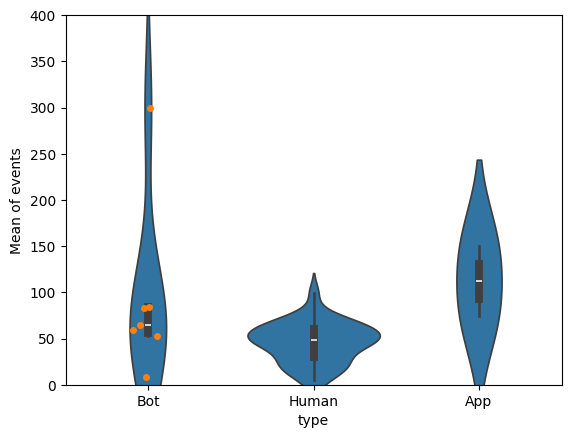

In [180]:
# YOUR CODE BELOW
# compute the mean of events based on the type of the event
section6_df['mean'] = section6_df[['pr', 'issue', 'commit', 'repo']].mean(axis=1)
ax = plot_seaborn(section6_df, 'type','mean', 'Mean of events')


#### Mean number of events per event group

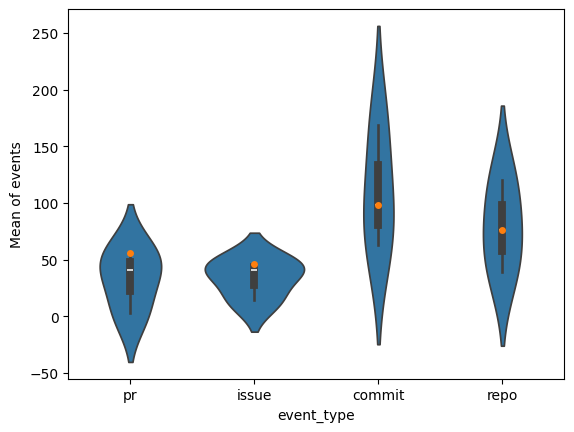

In [189]:
# YOUR CODE BELOW
event_types = ['pr', 'issue', 'commit', 'repo']
types = ['Bot', 'Human', 'App']
event_means = []
for event_type in event_types:
    for type in types:
        event_means.append({'event_type': event_type, 'type': type, 'mean': section6_df[section6_df['type'] == type][event_type].mean()})
event_means_df = pd.DataFrame.from_dict(event_means)

ax = plot_seaborn(event_means_df, 'event_type', 'mean', 'Mean of events')





#### Gini coeﬃcient of time between consecutive event

In [50]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [51]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

In [52]:
# YOUR CODE BELOW


In [53]:
# YOUR CODE BELOW


### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?